# EJERCICIOS

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Concatenate
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

2025-01-28 16:29:06.155815: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-28 16:29:06.163276: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-28 16:29:06.172394: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-28 16:29:06.174966: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-28 16:29:06.182362: I tensorflow/core/platform/cpu_feature_guar

## EJERCICIO 1


Supongamos que queremos predecir dos objetivos diferentes (por ejemplo, precio y categoría) a partir de dos conjuntos de características diferentes (por ejemplo, características visuales y características de texto de un producto).

* Características visuales: un conjunto de 128 características numéricas, que podrían representar, por ejemplo, valores de píxeles o características extraídas de imágenes.
* Características de texto: un conjunto de 256 características numéricas, representando posiblemente la codificación de texto o características lingüísticas.
* Precio (Salida 1): un valor numérico que representa el precio de un producto.
* Categoría (Salida 2): una etiqueta de categoría, que asumiremos que puede tomar 10 valores diferentes (por ejemplo, 10 categorías diferentes de productos).

Voy a generar datos aleatorios

In [2]:
# Generación de datos ficticios
num_muestras = 1000  # Número de muestras en el conjunto de datos

# Características visuales: 128 características numéricas
caracteristicas_visuales = np.random.rand(num_muestras, 128)

# Características de texto: 256 características numéricas
caracteristicas_texto = np.random.rand(num_muestras, 256)

# Precio (Salida 1): Valor numérico (por ejemplo, precio de un producto)
precio = np.random.rand(num_muestras, 1)

# Categoría (Salida 2): 10 categorías posibles (codificadas en one-hot)
categorias = np.random.randint(0, 10, size=(num_muestras, 1))
categorias_one_hot = tf.keras.utils.to_categorical(categorias, num_classes=10)

Divide los datos en entrenamiento y prueba

In [3]:
x1_full_train, x1_test, y1_full_train, y1_test = train_test_split(caracteristicas_visuales, precio, test_size=0.2, random_state=45)   # Características visuales  # Precio (Salida 1)
x2_full_train, x2_test, y2_full_train, y2_test = train_test_split(caracteristicas_texto, categorias_one_hot, test_size=0.2, random_state=45)      # Categoría (Salida 2)  # Características de texto
x1_train, x1_val, y1_train, y1_val = train_test_split(x1_full_train, y1_full_train, test_size=0.2, random_state=42)    
x2_train, x2_val, y2_train, y2_val = train_test_split(x2_full_train, y2_full_train, test_size=0.2, random_state=42)     


# (train_carac_visuales,temp_carac_visuales,train_carac_texto,temp_carac_texto,train_precio,temp_precio,train_categorias,temp_categorias,) = train_test_split(caracteristicas_visuales, caracteristicas_texto,precio,categorias_one_hot,test_size=0.2,random_state=42,)

len(x1_train),len(y1_train),len(x2_train),len(y2_train),len(x1_test),len(y1_test)

(640, 640, 640, 640, 200, 200)

Construye el modelo:
* Crea dos ramas de entrada, una para cada tipo de características.
* Las ramas se fusionarán para predecir el precio.
* Una de las ramas se utilizará también para predecir la categoria.

El esquema es el siguiente:

<img src="../datos/esquema_modelo_funcional.png" alt="esquema modelo funcional"/>

In [16]:
# capas
input_visual = tf.keras.layers.Input(shape=x1_train.shape[1:])
input_texto = tf.keras.layers.Input(shape=x2_train.shape[1:])
rama_visual = tf.keras.layers.Dense(64, activation='relu')
rama_texto = tf.keras.layers.Dense(128, activation='relu')
combi = tf.keras.layers.Concatenate()
salida_precio = tf.keras.layers.Dense(1, name='salida_precio')
salida_categoria = tf.keras.layers.Dense(10, name='salida_cate', activation='softmax')

# orden de las capas
hidden1_v = rama_visual(input_visual)
hidden1_t = rama_texto(input_texto)
concat = combi([hidden1_v,hidden1_t])
salida_p = salida_precio(concat)
salida_c = salida_categoria(hidden1_t)

# modelo
model = tf.keras.Model(inputs=[input_visual,input_texto], outputs=[salida_p,salida_c])

Comprueba creando una imagen del modelo que es igual que el que se pide

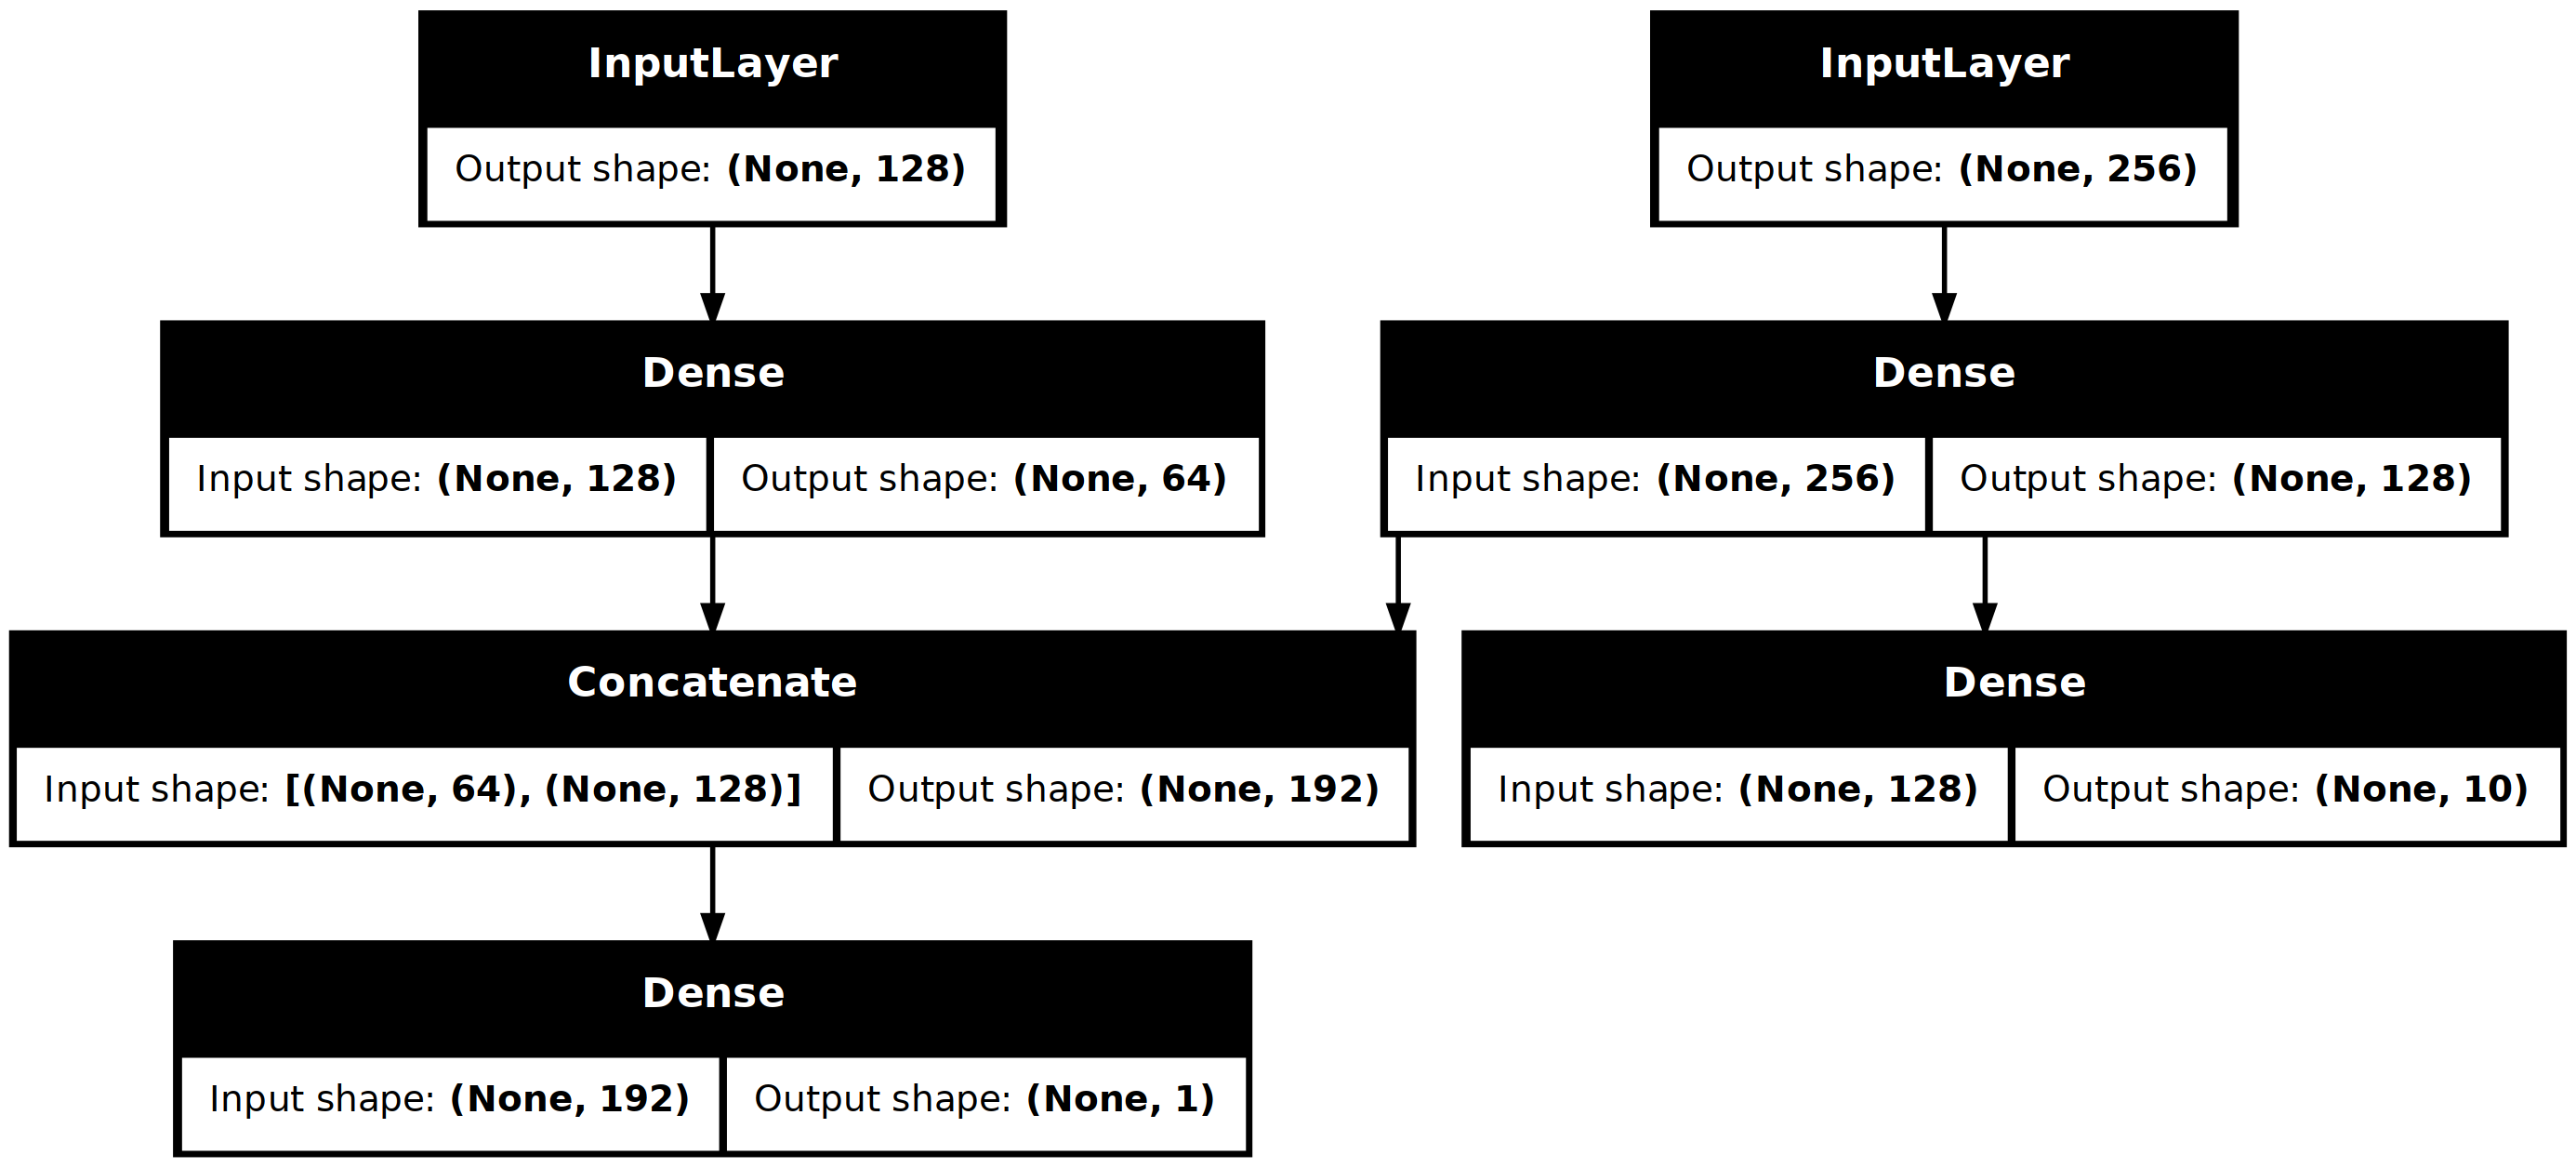

In [17]:
tf.keras.utils.plot_model(model, "recursos/imgs/modelo_4_7_1.png", show_shapes=True)

Compila el modelo especificando las pérdidas y métricas para cada salida (utiliza el optimizador Adam)

In [18]:
model.compile(loss={'salida_precio':'mse', 'salida_cate':'categorical_crossentropy'} ,   
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics={'salida_precio':['RootMeanSquaredError'], 'salida_cate':['accuracy']})


Entrena el modelo 

In [24]:
hist = model.fit((x1_train,x2_train), (y1_train, y2_train), epochs=30, validation_data=((x1_val,x2_val),(y1_val,y2_val)), batch_size=50)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0054 - salida_cate_accuracy: 0.9577 - salida_cate_loss: 0.0054 - salida_precio_RootMeanSquaredError: 1.5961 - salida_precio_loss: 5.8949e-08 - val_loss: 0.1309 - val_salida_cate_accuracy: 0.1187 - val_salida_cate_loss: 0.1301 - val_salida_precio_RootMeanSquaredError: 1.6178 - val_salida_precio_loss: 5.6333e-08
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0044 - salida_cate_accuracy: 0.9666 - salida_cate_loss: 0.0044 - salida_precio_RootMeanSquaredError: 1.6046 - salida_precio_loss: 5.8815e-08 - val_loss: 0.1296 - val_salida_cate_accuracy: 0.1125 - val_salida_cate_loss: 0.1295 - val_salida_precio_RootMeanSquaredError: 1.6233 - val_salida_precio_loss: 5.6333e-08
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 - salida_cate_accuracy: 0.9787 - salida_cate_loss: 0.0029 - salida_precio_RootMeanSquaredError: 1.6192 - salida_precio_loss: 5.8766e-08 - val_loss: 0.1308 - val_salida_cate_accuracy: 0.1063 

Evalúa el modelo en el conjunt de pruebas

In [26]:
mse_test = model.evaluate((x1_test, x2_test), (y1_test,y2_test))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1369 - salida_cate_accuracy: 0.0899 - salida_cate_loss: 0.1362 - salida_precio_RootMeanSquaredError: 1.5614 - salida_precio_loss: 6.3223e-08


## EJERCICIO 2

El objetivo de este ejercicio es entrenar un modelo en un subconjunto de clases (Modelo A) y luego usar este modelo para entrenar otro modelo en un subconjunto diferente de clases (Modelo B), primero sin y luego con el conocimiento transferido del Modelo A.

Carga los datos de CIFAR-10, representa alguna de sus imágenes con sus etiquetas, haz una lista con las etiquetas que tiene (busca en internet) y normaliza los datos dividiendo entre 255.0.

Divide los datos en conjuntos de entrenamiento, pruebas y validación para el modelo A y para el modelo B:
* El modelo A utiliza las clases "avión", "automóvil", "pájaro" y "gato"
* El modelo B utiliza las clases "ciervo", "perro", "rana" y "caballo" 

In [11]:
datos = tf.keras.datasets.cifar10.load_data()

# Dividimos las tuplas en x e y
(x_train_full, y_train_full), (x_test, y_test) = datos

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

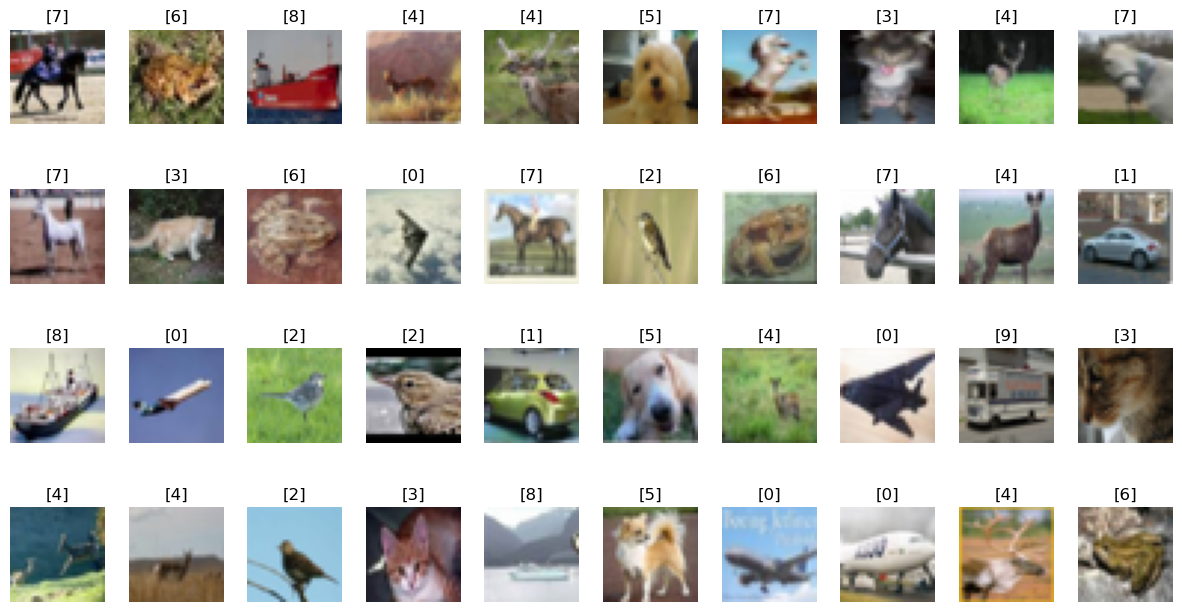

In [ ]:
def mostrar_imgs(x_arr,y_arr):     # muestra 40 imgs
    fig,ax = plt.subplots(4,10, figsize=(15,8))
    ax = ax.flatten()
    # aniadimos las imagenes al grafico
    for i in range(40):
        ax[i].set_title(y_arr[i])
        ax[i].imshow(x_arr[i])
        ax[i].axis("off") 
    plt.subplots_adjust(wspace=0.25, hspace=0.15)   # ajusta los margenes para separar las imágenes 
    plt.show()
mostrar_imgs(x_test,y_test)

In [4]:
soluciones = {0: 'avion', 1: 'coche',2: 'pajaro', 3: 'gato', 4: 'ciervo', 
            5: 'perro', 6: 'rana', 7: 'caballo', 8: 'barco', 9: 'camion'}

In [39]:
# valores de y
values,count = np.unique(y_train,return_counts=True)
for y, cant in zip(values,count):
    print(y,' --> ',cant)
len(y_train)

0  -->  5000
1  -->  5000
2  -->  5000
3  -->  5000
4  -->  5000
5  -->  5000
6  -->  5000
7  -->  5000
8  -->  5000
9  -->  5000


50000

In [12]:
# normalizar  /255
x_train, x_val, x_test = x_train/255. , x_val/255. , x_test/255. 

Entrena el Modelo A       
- El modelo A utiliza las clases "avión", "automóvil", "pájaro" y "gato"

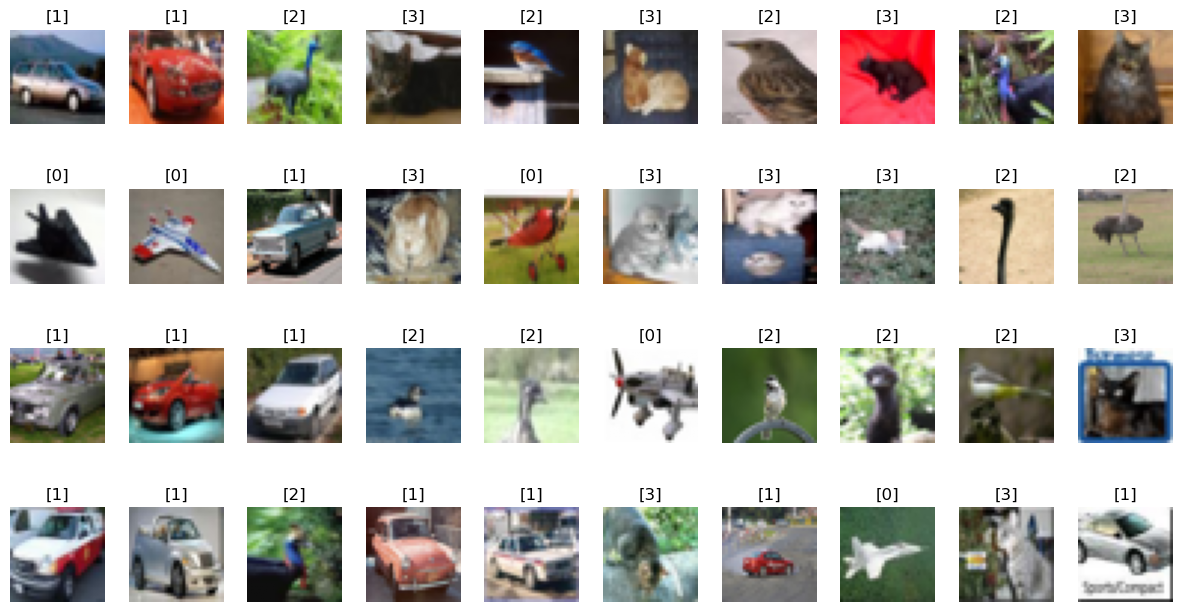

In [6]:
filter_arr = np.isin(y_train, [0,1,2,3]).reshape(-1)   # reshape para que funcione con imagenes tambien
x_train_a = x_train[filter_arr]
y_train_a = y_train[filter_arr]

filter_arr = np.isin(y_test, [0,1,2,3]).reshape(-1)   
x_test_a = x_test[filter_arr]
y_test_a = y_test[filter_arr]

filter_arr = np.isin(y_val, [0,1,2,3]).reshape(-1)   
x_val_a = x_val[filter_arr]
y_val_a = y_val[filter_arr]

mostrar_imgs(x_train_a,y_train_a)

In [7]:
# crear capas
tf.random.set_seed(42)
model_A = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(4, activation="softmax")
])

# compilar
model_A.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# entrenar
hist_A = model_A.fit(x_train_a, y_train_a, epochs=60, validation_data=(x_val_a, y_val_a))


I0000 00:00:1738078204.942536   21693 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738078204.966832   21693 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738078204.967006   21693 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1738078204.969035   21693 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/60


I0000 00:00:1738078206.284956   21804 service.cc:146] XLA service 0x74383400ac80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738078206.284991   21804 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2025-01-28 16:30:06.300231: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-01-28 16:30:06.355797: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101
2025-01-28 16:30:07.140457: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_343', 8 bytes spill stores, 8 bytes spill loads



200/625 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step - accuracy: 0.3854 - loss: 1.3528

I0000 00:00:1738078207.656921   21804 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4648 - loss: 1.2178 - val_accuracy: 0.5594 - val_loss: 1.0406
Epoch 2/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.5999 - loss: 0.9785 - val_accuracy: 0.6189 - val_loss: 0.9124
Epoch 3/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 794us/step - accuracy: 0.6282 - loss: 0.9109 - val_accuracy: 0.6508 - val_loss: 0.8471
Epoch 4/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 814us/step - accuracy: 0.6532 - loss: 0.8731 - val_accuracy: 0.6533 - val_loss: 0.8394
Epoch 5/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - accuracy: 0.6640 - loss: 0.8352 - val_accuracy: 0.6663 - val_loss: 0.8410
Epoch 6/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 839us/step - accuracy: 0.6747 - loss: 0.8135 - val_accuracy: 0.6653 - val_loss: 0.8390
Epoch 7/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - accuracy: 0.6854 - loss: 0.7845 - val_accuracy: 0.6593 - val_loss: 0.8391
Epoch 8/60
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - accuracy: 0.6944 - loss: 0.7704 - val_accuracy:

Entrenar el Modelo B desde 0    
- El modelo B utiliza las clases "ciervo", "perro", "rana" y "caballo"

In [13]:
filter_arr = np.isin(y_train, [4,5,6,7]).reshape(-1)   # reshape para que funcione con imagenes tambien
x_train_b = x_train[filter_arr]
y_train_b = y_train[filter_arr] -4

filter_arr = np.isin(y_test, [4,5,6,7]).reshape(-1)   
x_test_b = x_test[filter_arr]
y_test_b = y_test[filter_arr] -4

filter_arr = np.isin(y_val, [4,5,6,7]).reshape(-1)   
x_val_b = x_val[filter_arr]
y_val_b = y_val[filter_arr] -4

# mostrar_imgs(x_val_b,y_val_b)
print('train',len(x_train_b), 'test',len(x_test_b),' val',len(x_val_b))
y_test_b

train 16062 test 4000  val 3938


array([[2],
       [2],
       [2],
       ...,
       [1],
       [1],
       [3]], dtype=uint8)

In [14]:
# crear capas
tf.random.set_seed(42)

model_B = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dense(4, activation="softmax")
])

# compilar
model_B.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# entrenar
hist_B = model_B.fit(x_train_b, y_train_b, epochs=60, validation_data=(x_val_b, y_val_b))

Epoch 1/60
496/502 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.3739 - loss: 1.3411

2025-01-28 16:51:10.244934: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_380', 24 bytes spill stores, 24 bytes spill loads



502/502 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3746 - loss: 1.3403 - val_accuracy: 0.5114 - val_loss: 1.1352
Epoch 2/60
502/502 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.4942 - loss: 1.1475 - val_accuracy: 0.4840 - val_loss: 1.1536
Epoch 3/60
502/502 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.5207 - loss: 1.0932 - val_accuracy: 0.4970 - val_loss: 1.1361
Epoch 4/60
502/502 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.5461 - loss: 1.0548 - val_accuracy: 0.4987 - val_loss: 1.1335
Epoch 5/60
502/502 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.5551 - loss: 1.0315 - val_accuracy: 0.5340 - val_loss: 1.0713
Epoch 6/60
502/502 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.5725 - loss: 0.9983 - val_accuracy: 0.5140 - val_loss: 1.1053
Epoch 7/60
502/502 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.5843 - loss: 0.9806 - val_accuracy: 0.5216 - val_loss: 1.1202
Epoch 8/60
502/502 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.5937 - loss: 0.9604 - val_accuracy:

Entrenar el Modelo B utilizando las capas aprendidas del Modelo A (excepto la capa de salida)

In [19]:
# modelo B a partir de A
clone_A = tf.keras.models.clone_model(model_A)
clone_A.set_weights(model_A.get_weights())
model_BA = tf.keras.Sequential(model_A.layers[:-1])    # todas las capas menos ultima
model_BA.add(tf.keras.layers.Dense(4, activation="softmax"))    # crear ultuma capa

# congelar capas heredadas de A
for layer in model_BA.layers[:-1]:
    layer.trainable = False

# compilar y entrenar
model_BA.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
hist_BA = model_BA.fit(x_train_b, y_train_b, epochs=40, validation_data=(x_val_b, y_val_b))


# decongelar capas y volver a compilar y entrenar
for layer in model_BA.layers[:-1]:
    layer.trainable = True

model_BA.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
hist_BA = model_BA.fit(x_train_b, y_train_b, epochs=50, validation_data=(x_val_b, y_val_b))

Epoch 1/40
502/502 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4684 - loss: 1.7784 - val_accuracy: 0.5668 - val_loss: 1.2229
Epoch 2/40
502/502 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.6633 - loss: 0.8663 - val_accuracy: 0.5934 - val_loss: 1.1378
Epoch 3/40
502/502 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - accuracy: 0.6921 - loss: 0.7662 - val_accuracy: 0.5960 - val_loss: 1.1410
Epoch 4/40
502/502 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.7030 - loss: 0.7348 - val_accuracy: 0.5985 - val_loss: 1.1547
Epoch 5/40
502/502 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.7076 - loss: 0.7198 - val_accuracy: 0.6001 - val_loss: 1.1707
Epoch 6/40
502/502 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.7114 - loss: 0.7104 - val_accuracy: 0.6008 - val_loss: 1.1864
Epoch 7/40
502/502 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.7129 - loss: 0.7038 - val_accuracy: 0.5990 - val_loss: 1.2010
Epoch 8/40
502/502 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.7163 - loss: 0.6992 - va

Evaluar los dos modelos para el conjunto de datos B en el conjunto de pruebas

In [20]:
eval_A = model_A.evaluate(x_test_a,y_test_a)
print('Evaluacion Modelo A desde 0',eval_A,'\n')

eval_B = model_B.evaluate(x_test_b,y_test_b)
print('Evaluacion Modelo B desde 0',eval_B,'\n')

eval_BA = model_BA.evaluate(x_test_b,y_test_b)
print('Evaluacion Modelo B con capas de A',eval_BA)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - accuracy: 0.4131 - loss: 2.8583
Evaluacion Modelo A desde 0 [2.838792085647583, 0.4254254400730133] 

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step - accuracy: 0.5667 - loss: 1.2836
Evaluacion Modelo B desde 0 [1.2628213167190552, 0.5787500143051147] 

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.5845 - loss: 1.9179
Evaluacion Modelo B con capas de A [1.9849660396575928, 0.5837500095367432]


¿En este caso merece la pena?

Aunque mejora el resultado es poco como para que valga la pena en este caso. 
Creo que se notará más la diferencia en casos con muchos mas datos 